In [1]:
# Create a function that returns the required local i.e. UTF-8

import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [2]:
#This commnd help to install all the  lilisted libraries
!pip install pyLDAvis
!pip install bertopic
!pip install flair
!apt-get -qq install -y libfluidsynth1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 19.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 19.8 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 

In [3]:
# Importing modules
import pandas as pd
import os
# Text preprocessiong
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()
# Topic model
from bertopic import BERTopic
# Dimension reduction
from umap import UMAP
# Clustering
from hdbscan import HDBSCAN
from sklearn.cluster import KMeans
# Count vectorization
from sklearn.feature_extraction.text import CountVectorizer
# Sentence transformer
from sentence_transformers import SentenceTransformer
# Flair
from transformers.pipelines import pipeline
from flair.embeddings import TransformerDocumentEmbeddings, WordEmbeddings, DocumentPoolEmbeddings, StackedEmbeddings


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [4]:
# Load the csv file saved in my github repository
import urllib.request

# Read the CSV file
topics = pd.read_csv('https://raw.githubusercontent.com/Tboyfist/Topic-Modeling/main/Weather.csv')

# Print head
topics.head()

,Authors,Author full names,Author(s) ID,Title,Link,Abstract,Open Access
0,Boyd K.; Wang Z.,"Boyd, Kevin (58091094600); Wang, Zhuo (5657572...",58091094600; 56575724100,Revisiting the Relationship between Polar Lows...,https://www.scopus.com/inward/record.uri?eid=2...,The link between weather regimes (WRs) and pol...,NaN
1,Latkin C.A.; Dayton L.; Winiker A.; Countess K...,"Latkin, Carl A. (7006006751); Dayton, Lauren (...",7006006751; 57192398716; 57204658072; 57208747...,"‘They Talk about the Weather, but No One Does ...",https://www.scopus.com/inward/record.uri?eid=2...,Understanding everyday conversations about cli...,All Open Access; Gold Open Access
2,Cameron I.; Fyffe B.; Kish A.,"Cameron, Iain (35067913300); Fyffe, Blair (650...",35067913300; 6504301028; 57222740503,No Scottish snow patches survive until winter ...,https://www.scopus.com/inward/record.uri?eid=2...,[No abstract available],NaN
3,Dampeyrou C.; Goichon A.; Ghienne M.; Tschanne...,"Dampeyrou, Charles (57215115787); Goichon, Ant...",57215115787; 58778831800; 57191838086; 5721175...,Unsupervised separation of the thermosensitive...,https://www.scopus.com/inward/record.uri?eid=2...,A large part of French electricity consumption...,NaN
4,Du M.; Shi H.; Yin R.; Yang J.; Shi F.; Zheng ...,"Du, Min (57916812500); Shi, Haokun (5720736780...",57916812500; 57207367800; 58732331700; 5799759...,TDA/rGO@WS with Joule heat and photothermal sy...,https://www.scopus.com/inward/record.uri?eid=2...,Oil spills are a global environmental protecti...,NaN


In [5]:
#This command gives the statiscal analysis of the dataset
topics.describe(include='all')

,Authors,Author full names,Author(s) ID,Title,Link,Abstract,Open Access
count,4998,4998,4998,5000,5000,5000,2514
unique,4942,4948,4938,4999,5000,4940,8
top,Hayasaka H.,"Hayasaka, Hiroshi (56243631300)",56243631300,Vitality assessment of exposed lichens along d...,https://www.scopus.com/inward/record.uri?eid=2...,[No abstract available],All Open Access; Gold Open Access; Green Open ...
freq,4,4,4,2,1,61,669


In [6]:
#This command print he heading for visualization
topics.head(0)

,Authors,Author full names,Author(s) ID,Title,Link,Abstract,Open Access


In [7]:
# Remove columns that does not relate to the task and select only the 100 sample for quick implementation
topics = topics.drop(columns=['Authors', 'Author full names', 'Author(s) ID', 'Link','Open Access'], axis=1).sample(100)

# Print out the first rows of papers
topics.head()

,Title,Abstract
2469,The temporal evolution of PM2.5 pollution even...,This study conducted a cluster analysis on the...
2626,Change in paralytic shellfish toxins in the mu...,Paralytic shellfish toxins (PSTs) produced by ...
4352,Hydrochemical evaluation and identification of...,Groundwater samples were collected from 44 wel...
2122,Weather and distance to fire refugia limit lan...,The enemy release hypothesis proposes that inv...
1488,Quantify the role of anthropogenic emission an...,Air pollution is becoming serious in developin...


In [8]:
#This command help to get the dimension of the merged dataset
topics.shape

(100, 2)

In [9]:
# Remove stopwords
stopwords = nltk.corpus.stopwords.words('english')
print(f'There are {len(stopwords)} default stopwords. They are {stopwords}')

There are 179 default stopwords. They are ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'no

In [10]:
# Remove stopwords
topics['abstract_without_stopwords'] = topics['Abstract'].apply(lambda x: ' '.join([w for w in x.split() if w.lower() not in stopwords]))
# Lemmatization
topics['abstract_lemmatized'] = topics['abstract_without_stopwords'].apply(lambda x: ' '.join([wn.lemmatize(w) for w in x.split() if w not in stopwords]))
# Take a look at the data
topics.head()

,Title,Abstract,abstract_without_stopwords,abstract_lemmatized
2469,The temporal evolution of PM2.5 pollution even...,This study conducted a cluster analysis on the...,study conducted cluster analysis fine particul...,study conducted cluster analysis fine particul...
2626,Change in paralytic shellfish toxins in the mu...,Paralytic shellfish toxins (PSTs) produced by ...,Paralytic shellfish toxins (PSTs) produced Ale...,Paralytic shellfish toxin (PSTs) produced Alex...
4352,Hydrochemical evaluation and identification of...,Groundwater samples were collected from 44 wel...,Groundwater samples collected 44 wells Ramgang...,Groundwater sample collected 44 well Ramganga ...
2122,Weather and distance to fire refugia limit lan...,The enemy release hypothesis proposes that inv...,enemy release hypothesis proposes invasion exo...,enemy release hypothesis proposes invasion exo...
1488,Quantify the role of anthropogenic emission an...,Air pollution is becoming serious in developin...,Air pollution becoming serious developing coun...,Air pollution becoming serious developing coun...


In [11]:
# Load the regular expression library
import re

# Remove punctuation
topics['Abstract_processed'] = \
topics['Abstract'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
topics['Abstract_processed'] = \
topics['Abstract_processed'].map(lambda x: x.lower())

# Print out the first rows of topics
topics['Abstract'].head()

2469    This study conducted a cluster analysis on the...
2626    Paralytic shellfish toxins (PSTs) produced by ...
4352    Groundwater samples were collected from 44 wel...
2122    The enemy release hypothesis proposes that inv...
1488    Air pollution is becoming serious in developin...
Name: Abstract, dtype: object

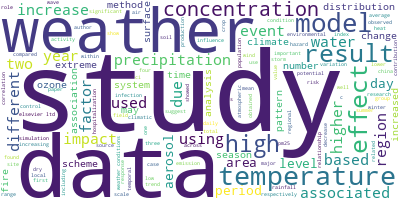

In [12]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(topics['Abstract_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [13]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]


data = topics.Abstract_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['study', 'conducted', 'cluster', 'analysis', 'fine', 'particulate', 'matter', 'pm', 'data', 'taiwan', 'diagnosed', 'association', 'synoptic', 'weather', 'patterns', 'five', 'clusters', 'identified', 'via', 'hierarchical', 'clustering', 'algorithm', 'three', 'correspond', 'severe', 'events', 'distinct', 'pattern', 'temporal', 'evolution']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 5), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [15]:
from pprint import pprint

# number of topics
num_topics = 5

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[(0,
  '0.007*"weather" + 0.006*"data" + 0.005*"water" + 0.005*"study" + '
  '0.005*"precipitation" + 0.004*"high" + 0.004*"climate" + '
  '0.004*"temperature" + 0.004*"conditions" + 0.003*"results"'),
 (1,
  '0.005*"study" + 0.005*"weather" + 0.005*"data" + 0.005*"pollen" + '
  '0.004*"events" + 0.004*"also" + 0.004*"results" + 0.003*"two" + '
  '0.003*"based" + 0.003*"time"'),
 (2,
  '0.010*"weather" + 0.006*"temperature" + 0.006*"study" + 0.005*"data" + '
  '0.003*"high" + 0.003*"results" + 0.003*"model" + 0.003*"effects" + '
  '0.003*"different" + 0.003*"events"'),
 (3,
  '0.009*"weather" + 0.005*"pm" + 0.004*"results" + 0.004*"study" + '
  '0.004*"conditions" + 0.004*"fire" + 0.003*"air" + 0.003*"precipitation" + '
  '0.003*"data" + 0.003*"higher"'),
 (4,
  '0.006*"data" + 0.005*"weather" + 0.005*"study" + 0.005*"model" + '
  '0.004*"ozone" + 0.004*"soil" + 0.004*"water" + 0.003*"temperature" + '
  '0.003*"air" + 0.003*"distribution"')]


In [16]:
#This command is using LDA  (Latent Dirichlet Allocation)
import pyLDAvis.gensim_models
import pickle
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('/content_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, 'content_'+ str(num_topics) +'.html')

LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.003579 -0.024529       1        1  29.323930
2      0.000482 -0.007593       2        1  18.531972
3     -0.019395  0.023840       3        1  17.639118
1      0.035361  0.010052       4        1  17.607736
4     -0.012869 -0.001770       5        1  16.897245, topic_info=               Term       Freq      Total Category  logprob  loglift
554          pollen  18.000000  18.000000  Default  30.0000  30.0000
1110          ozone  31.000000  31.000000  Default  29.0000  29.0000
64               pm  28.000000  28.000000  Default  28.0000  28.0000
334            fire  22.000000  22.000000  Default  27.0000  27.0000
870            soil  27.000000  27.000000  Default  26.0000  26.0000
...             ...        ...        ...      ...      ...      ...
64               pm   5.241432  28.521249   Topic5  -6.1676   0.0840
707            used   5.315341  36.305026   Topic5  -6.1536  -0.1433
136          higher   5.266214  37.929862   Topic5  -6.1628  -0.1964
415            time   5.084441  36.488947   Topic5  -6.1980  -0.1928
926   precipitation   5.233687  44.213185   Topic5  -6.1690  -0.3559

[389 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
180       1  0.263032  activity
180       2  0.157819  activity
180       3  0.263032  activity
180       4  0.210426  activity
180       5  0.157819  activity
...     ...       ...       ...
431       3  0.086596      year
431       4  0.086596      year
431       5  0.173192      year
2960      1  0.420219        δc
2960      4  0.420219        δc

[887 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 4, 2, 5])

In [17]:
# This command is using BERTopic Model
umap_model = UMAP(n_neighbors=15,
                  n_components=5,
                  min_dist=0.0,
                  metric='cosine',
                  random_state=100)
# Clustering model
# hdbscan_model = HDBSCAN(min_cluster_size=5, min_samples = 5,
# metric='euclidean', prediction_data=True)
kmeans_model = KMeans(n_clusters=5)
# Initiate a sentence transformer model
sentence_model = SentenceTransformer("paraphrase-albert-small-v2")
# Initiate a pretrained model
hf_model = pipeline("feature-extraction", model="distilroberta-base")

# Initiate a pretrained embedding model
roberta_model = TransformerDocumentEmbeddings('roberta-base')
# Initiate another pretrained embedding model
glove_embedding = WordEmbeddings('crawl')
document_glove_embeddings = DocumentPoolEmbeddings([glove_embedding])
# Stack the two pretrained embedding models
stacked_embeddings = StackedEmbeddings(embeddings=[roberta_model,
document_glove_embeddings])

# Count vectorizer
vectorizer_model = CountVectorizer(min_df=10)

# Initiate BERTopic
# topic_model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True,hdbscan_model=kmeans_model,
#                        embedding_model=stacked_embeddings,min_topic_size=5, n_gram_range=(1, 3),diversity=0.8)#vectorizer_model=vectorizer_model)# Other options for embedding_model are sentence_model, hf_model,roberta_model

# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True,hdbscan_model=kmeans_model, n_gram_range=(1, 3))
# Run BERTopic model
topics, probabilities = topic_model.fit_transform(topics['abstract_lemmatized'])#abstract_lemmatized

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.06k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/827 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.7M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/245 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

2024-04-23 21:54:48,208 https://flair.informatik.hu-berlin.de/resources/embeddings/token/en-fasttext-crawl-300d-1M.vectors.npy not found in cache, downloading to /tmp/tmpdmh5qv85


100%|██████████| 1.12G/1.12G [00:32<00:00, 37.4MB/s]

2024-04-23 21:55:20,462 copying /tmp/tmpdmh5qv85 to cache at /root/.flair/embeddings/en-fasttext-crawl-300d-1M.vectors.npy


2024-04-23 21:55:33,111 removing temp file /tmp/tmpdmh5qv85
2024-04-23 21:55:33,855 https://flair.informatik.hu-berlin.de/resources/embeddings/token/en-fasttext-crawl-300d-1M not found in cache, downloading to /tmp/tmpko8p025l


100%|██████████| 37.5M/37.5M [00:01<00:00, 37.6MB/s]

2024-04-23 21:55:35,117 copying /tmp/tmpko8p025l to cache at /root/.flair/embeddings/en-fasttext-crawl-300d-1M


2024-04-23 21:55:35,203 removing temp file /tmp/tmpko8p025l


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [18]:
# Get top 10 terms for a topic
topic_model.get_topic(0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('temperature', 0.018991981430768523),
 ('weather', 0.01760941307007496),
 ('extreme', 0.01399884568965211),
 ('effect', 0.012208073116274067),
 ('increase', 0.011798468538181494),
 ('data', 0.01151732950807659),
 ('95', 0.010315329930740677),
 ('study', 0.010072526626579472),
 ('heat', 0.009774047008922954),
 ('ci', 0.009525448457606733)]

In [19]:
# Visualize top topic keywords
topic_model.visualize_barchart(top_n_topics=12)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
# Visualize term rank decrease
topic_model.visualize_term_rank()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [21]:
# Visualize intertopic distance
topic_model.visualize_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [22]:
# Visualize connections between topics using hierachical clustering
topic_model.visualize_hierarchy(top_n_topics=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/plotly/figure_factory/_dendrogram.py:350: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.10/dist-packages/plotly/figure_factory/_dendrogram.py:351: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.10/dist-packages/plotly/figure_factory/_dendrogram.py:352: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/usr/local/lib/python3.10/dist-packages/plotly/figure_factory/_dendrogram.py:353: DeprecationWarning:


In [23]:
# Visualize similarity using heatmap
topic_model.visualize_heatmap()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

